In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import os
os.getcwd()

'/Users/sarana/Documents/TEA/teadt-community-survey/data_analysis'

# Content Analysis

This notebook documents the method we applied for systematically examining the free-text data collected across four distinct survey fields. The survey fields included the following questions:

- What do you understand ‘assurance’ to mean in the context of your work? (code: assurance_meaning)
- *For those [Gemini principles] rated very difficult or extremely difficult to operationalize, what are the main challenges you face? (code: operationalization_challenges)
- Would a visual tool that helps you demonstrate and communicate how your evidence-based assurance measures align with key ethical goals enhance trust in your digital twin(s)?
    - If yes, what do you believe are the main benefits? (code: benefits_of_visual_tool)
    - If no, why not? (code: reasons_against_visual_tool)

To identify recurring themes and patterns within these responses, we employed a multi-stage coding strategy involving three independent coders.

The content analysis was carried out as follows:

- Step 1 **Initial Coding** : Two coders independently reviewed and coded each response, applying multiple tags to capture the nuances of the data.
- Step 2 **Code Alignment**: The two coders then discussed individual coding decisions, aiming to reconcile any discrepancies and streamline the codes. This collaborative process resulted in a reduced and harmonized set of codes.
- Step 3 **Validation Coding**: The two coders and an additional third independent coder subsequently applied this refined code set to the data, ensuring an unbiased application of the codes and further validating the consistency of the analysis.
- Step 4 **Compute Inter-coder reliability** weak inter-coder reliability after first pass, discussion with all coders to clarify questions/issues about the coding scheme.
- Step 5 **Code Alignment - 2 coders** This involved repeated meetings between first two coders to align on coding and adjust codes accordingly
- Step 6 **2nd pass Coding** All three coders went through responses and coded according to adjusted coding scheme
- Step 7 **Code alignment - 3 coders** remaining differences were discussed between all 3 coders and for each response consensus was formed around the final set of codes. During this process some codes were added/dropped based on the following:
    - If one coder strongly disagrees with a code, the code was not included for the response in question.
    - If divergence in coding was due to some sort of redundancy caused by multiple overlapping codes, we formed consensus around the minimal set of codes.
    - If divergence in coding was due to ambiguity in response, we adopetd a liberal assignment of codes.

In [3]:
# Load data
df_data = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='AssuranceMeaning')
# Load codes
df_codes = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='Content Codes')

In [4]:
#clean codes
from fuzzywuzzy import process

def find_closest_tag(tag, valid_tags):
    best_match, score = process.extractOne(tag, valid_tags)
    
    if (score < 100) & (score > 0):
        print(f"Replacing '{tag}' with '{best_match}' (Score: {score})")
    
    return best_match

def clean_codes_column(column):
    cleaned_codes = []
    for codes in column:
        if pd.isna(codes):
            cleaned_codes.append(codes)
        else:
            cleaned_codes.append(', '.join([find_closest_tag(tag.strip(), df_codes['Content Code'].unique()) for tag in codes.split(',')]))
    return cleaned_codes

def clean_data(df, column_name):
    df.replace('\xa0', np.nan, inplace=True)
    df = df.dropna(subset=[column_name])
    df.loc[:,'codes_nathan'] = clean_codes_column(df['codes_nathan'])
    df.loc[:,'codes_sophie'] = clean_codes_column(df['codes_sophie'])
    df.loc[:,'codes_chris'] = clean_codes_column(df['codes_chris'])

    return df

df_data = clean_data(df_data, 'assurance_meaning')
df_data.tail()


Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'accessible' with 'accessibility' (Score: 78)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'reproducibility' with 'responsibility' (Score: 76)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'security' with 'privacy/security' (Score: 90)
Replacing 'Reliablity' with 'reliability' (Score: 95)
Replacing 'Explainability' with

Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'bias' with 'assurance as outcome' (Score: 45)
Replacing 'stakeholder invovlement' with 'stakeholder involvement' (Score: 96)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standard' with 'compliance/ standards' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'intended outcome' with 'intended outcomes of DTs' (Score: 90)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'safety' with 'user trust/confidence' (Score: 45)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Sco

,_id,assurance_meaning,codes_nathan,codes_sophie,codes_chris
44,388c3b87-7882-4cd3-b2b6-2a22d5919518,The capability of the digital twin to ensure a...,"accuracy, reliability, validation/testing/veri...","example of process, accuracy, reliability, sta...","accuracy, reliability, validity to real world,..."
45,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accuratel...,"accuracy, reliability, validity to real world,...","assurance as outcome, accuracy, reliability, v...","accuracy, reliability, validity to real world,..."
46,f5f66e46-ffe7-4396-a7c9-aa7e44a16fff,Grounds for justified confidence that requirem...,"pragmatic adequacy, user trust/confidence, int...","assurance as outcome, intended outcomes of DTs","user trust/confidence, validation/testing/veri..."
47,818eb50f-2a88-4821-bc13-0c2fe64b3098,Working with our partners and clients to verif...,"stakeholder involvement, validation/testing/ve...","example of process, validation/testing/verific...","validation/testing/verification, utility/value..."
48,fd1545e8-d61b-46c0-a2e0-ae354d83d41c,"For me, it should fundamentally mean gaining i...","responsibility, privacy/security, data concern...","example of process, privacy/security, example ...","privacy/security, user trust/confidence, data ..."


In [5]:
# Reshape data

# melt researcher columns into one long
df_long = pd.melt(df_data, id_vars=['_id', 'assurance_meaning'], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', 'assurance_meaning', 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()

In [6]:
df_codes
#paragmatic adequacy - sufficiency

,Question Code,Content Code,Explanation
0,assurance_meaning,assurance as process,Assurance as a process or series of actions or...
1,assurance_meaning,assurance as outcome,"Assurance as what it achieves, rather than wha..."
2,assurance_meaning,example of process,Highlighting specific components of the process.
3,assurance_meaning,user trust/confidence,Emphasizing building or maintaining user trust.
4,assurance_meaning,pragmatic adequacy,Emphasizing degree of outcome in context of use.
5,assurance_meaning,validation/testing/verification,Mention of any process of testing and using te...
6,assurance_meaning,compliance/ standards,Emphasizing adherence to standards or regulati...
7,assurance_meaning,risk awareness,Highlighting the identification and mitigation...
8,assurance_meaning,intended outcomes of DTs,Verifying that system features align with inte...
9,assurance_meaning,lifecycle,Considerations of the entire lifecycle of the ...


In [7]:
# number of unique tags specified in step 2
df_codes[df_codes['Question Code']=='assurance_meaning']

,Question Code,Content Code,Explanation
0,assurance_meaning,assurance as process,Assurance as a process or series of actions or...
1,assurance_meaning,assurance as outcome,"Assurance as what it achieves, rather than wha..."
2,assurance_meaning,example of process,Highlighting specific components of the process.
3,assurance_meaning,user trust/confidence,Emphasizing building or maintaining user trust.
4,assurance_meaning,pragmatic adequacy,Emphasizing degree of outcome in context of use.
5,assurance_meaning,validation/testing/verification,Mention of any process of testing and using te...
6,assurance_meaning,compliance/ standards,Emphasizing adherence to standards or regulati...
7,assurance_meaning,risk awareness,Highlighting the identification and mitigation...
8,assurance_meaning,intended outcomes of DTs,Verifying that system features align with inte...
9,assurance_meaning,lifecycle,Considerations of the entire lifecycle of the ...


In [8]:
# extract question specific codes
assurance_meaning_codes = df_codes[df_codes['Question Code']=='assurance_meaning']['Content Code'].unique()
assurance_meaning_codes = [code.strip() for code in assurance_meaning_codes]
assurance_meaning_codes

['assurance as process',
 'assurance as outcome',
 'example of process',
 'user trust/confidence',
 'pragmatic adequacy',
 'validation/testing/verification',
 'compliance/ standards',
 'risk awareness',
 'intended outcomes of DTs',
 'lifecycle',
 'objectivity',
 'stakeholder involvement',
 'validity to real world',
 'unsure',
 'data concerns',
 'reliability',
 'accuracy',
 'privacy/security',
 'utility/value',
 'explainability/understandable',
 'interoperability',
 'responsibility',
 'transparency',
 'accessibility']

## Analyse Coding Data

In [9]:
def has_differences(row):
    # Check if there is any column in the row that has a sum 1 or 2
    return row.isin([1, 2]).any()

df_grouped = df_wide.groupby(['assurance_meaning']).sum(numeric_only=True)
df_grouped['has_difference'] = df_grouped.apply(has_differences, axis=1)

print(f'{df_grouped['has_difference'].sum()} differences detected')


44 differences detected


In [10]:
# Identify & note diverging codes (columns with 1 or 2)
def diverge_codes1(row):
    diverging = row[row.isin([1, 2])].index.tolist() 
    return diverging 
df_grouped['diverging_codes'] = df_grouped[assurance_meaning_codes].apply(diverge_codes1, axis=1)

In [11]:
# Count how often each tag occured as divergent


all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()


[('assurance as outcome', 36),
 ('assurance as process', 15),
 ('intended outcomes of DTs', 14),
 ('example of process', 12),
 ('validation/testing/verification', 9),
 ('stakeholder involvement', 9),
 ('pragmatic adequacy', 7),
 ('risk awareness', 7),
 ('utility/value', 7),
 ('responsibility', 7),
 ('accuracy', 6),
 ('privacy/security', 5),
 ('validity to real world', 5),
 ('user trust/confidence', 5),
 ('data concerns', 4),
 ('transparency', 4),
 ('compliance/ standards', 3),
 ('objectivity', 2),
 ('explainability/understandable', 2),
 ('accessibility', 2),
 ('lifecycle', 2),
 ('reliability', 1)]

Text(0, 0.5, 'Frequency across all responses')

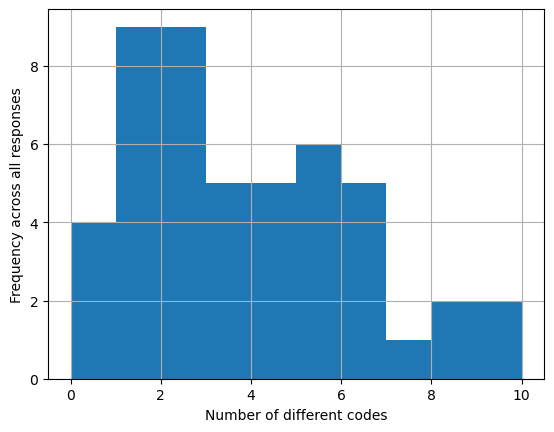

In [12]:
df_grouped['difference_count'] = df_grouped['diverging_codes'].apply(len)
df_grouped['difference_count'].hist()
plt.xlabel('Number of different codes')
plt.ylabel('Frequency across all responses')

In [13]:
# code counts per response ordered from most differences to least differences
df_grouped = df_grouped.sort_values(by='difference_count', ascending=False)


In [14]:
## Map extracted difference onto original data frame (which contains individual researcher coding)
df_wide['diverging_codes'] = df_wide['assurance_meaning'].map(df_grouped['diverging_codes'])
df_wide.head()

codes,_id,assurance_meaning,researcher,accessibility,accuracy,assurance as outcome,assurance as process,compliance/ standards,data concerns,example of process,...,responsibility,risk awareness,stakeholder involvement,transparency,unsure,user trust/confidence,utility/value,validation/testing/verification,validity to real world,diverging_codes
0,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_chris,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[validation/testing/verification, responsibility]"
1,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_nathan,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[validation/testing/verification, responsibility]"
2,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_sophie,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[validation/testing/verification, responsibility]"
3,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accuratel...,codes_chris,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[assurance as outcome, pragmatic adequacy]"
4,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accuratel...,codes_nathan,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[assurance as outcome, pragmatic adequacy]"


## **Step 3** Discussion to align on final codes

In [15]:
df_wide.columns

Index(['_id', 'assurance_meaning', 'researcher', 'accessibility', 'accuracy',
       'assurance as outcome', 'assurance as process', 'compliance/ standards',
       'data concerns', 'example of process', 'explainability/understandable',
       'intended outcomes of DTs', 'interoperability', 'lifecycle',
       'objectivity', 'pragmatic adequacy', 'privacy/security', 'reliability',
       'responsibility', 'risk awareness', 'stakeholder involvement',
       'transparency', 'unsure', 'user trust/confidence', 'utility/value',
       'validation/testing/verification', 'validity to real world',
       'diverging_codes'],
      dtype='object', name='codes')

In [16]:
## use this cell to implement any changes to align on codes (and keep track of changes)
## e.g. 
df_new = df_wide.copy() 
# Adjust the value in the specific cell
df_new.loc[(df_new['_id'] == '0bc58b69-09d6-4843-a8cd-84b9868b84d2') & 
           (df_new['researcher'] == 'codes_sophie'), 'accuracy'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_sophie'), 'integrity'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_nathan'), 'integrity'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_chris'), 'integrity'] = 0



In [17]:
#expand display so we can review all dteails
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


## Notes on joint discussion with all 3 coders:

- Drop 'assurance as outcome' as a code
- Merge 'assurance as process' & 'example of process' into **process** =  explicit mention of 'process', or 'activities' that are part of a process, attributes of a process
- Merge 'intended outcomes of DTs' and 'validation/testing/verification' into **verification/validation/testing = includes 'checking generalisability' and any reference to meeting requirements.

## Nathan & Sophie alignment

In [18]:
df_wide = df_wide[df_wide['researcher']!='codes_chris']
df_grouped = df_wide.groupby(['assurance_meaning']).sum(numeric_only=True)

In [19]:
def diverge_codes2(row):
    diverging = row[row.isin([1])].index.tolist() 
    return diverging 
df_grouped['diverging_codes'] = df_grouped[assurance_meaning_codes].apply(diverge_codes2, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()

[('assurance as outcome', 23),
 ('example of process', 10),
 ('intended outcomes of DTs', 9),
 ('assurance as process', 7),
 ('responsibility', 7),
 ('risk awareness', 6),
 ('validation/testing/verification', 5),
 ('stakeholder involvement', 5),
 ('accuracy', 4),
 ('privacy/security', 3),
 ('data concerns', 3),
 ('utility/value', 3),
 ('validity to real world', 3),
 ('pragmatic adequacy', 3),
 ('compliance/ standards', 3),
 ('user trust/confidence', 2),
 ('transparency', 2),
 ('objectivity', 1),
 ('accessibility', 1),
 ('lifecycle', 1),
 ('explainability/understandable', 1)]

In [20]:
code_of_interest = 'explainability/understandable'  # Replace with the specific code you're interested in
df_wide['diverging_codes'] = df_wide['assurance_meaning'].map(df_grouped['diverging_codes'])
df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][['assurance_meaning','researcher','explainability/understandable']]

codes,assurance_meaning,researcher,explainability/understandable
109,"To provide security about a certain topic like fairness, explainability, etc.",codes_nathan,1.0
110,"To provide security about a certain topic like fairness, explainability, etc.",codes_sophie,0.0


## Notes 2 coders: assurance meaning
- general rule: tags are independent. If there is a more specific code for something, don't also select a more general one to catpure the same aspect of the response.
- new code: integrity (outlier code)
- assurance as process - explicit mention of the word 'process' or attributes that correspond to a process
- compliance/standards - some form of approval at final stage before deployment  
- responsibility - beyond explicit mention, includes any response incorporating ethics
- risk awareness - somewhat technical definition of risk, safety risk
- stakeholder engagement - explicit mention of 'stakeholder(s)' or specific mention of any users and decision makers influencing the digital twin.
- Pragmatic adequacy = any response applying cautious/protective language to limit or qualify the scope of the assurance.

Additional observations:
- discussion point on how some responses are more detailed and 'definition-like' comapred to others more intuitive or anecdotal
- codes are hard to find, that's because community is not aligned on their understanding on assurance


In [21]:
df_data = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='OperationalisationChallenges')
df_data = clean_data(df_data, 'operationalization_challenges')

Replacing 'lack of community concensus' with 'lack of community consensus' (Score: 96)
Replacing 'explaining value' with 'explaining/communicating value' (Score: 86)
Replacing 'how to assure DT' with 'how to assure DTs' (Score: 97)
Replacing 'lack of community' with 'lack of community consensus' (Score: 90)
Replacing 'appropriate people involved/lack of expertise consensus' with 'appropriate people involved/lack of expertise' (Score: 95)


In [22]:
df_data.tail()

,_id,operationalization_challenges,codes_nathan,codes_sophie,codes_chris
44,388c3b87-7882-4cd3-b2b6-2a22d5919518,Technology limitations. company policies,"technology changes, changing/adding to organisational processes","technology changes, changing/adding to organisational processes",changing/adding to organisational processes
45,0bc58b69-09d6-4843-a8cd-84b9868b84d2,"Design for automation, design for scale.",data concerns,contextual/sector-specific concerns,NaN
46,f5f66e46-ffe7-4396-a7c9-aa7e44a16fff,"Being able to communicate the value to their end customers. For us as assurers, it is hard to show what value our customers will get from assurance as the main beneficiary may be our customers' customers",explaining/communicating value,explaining/communicating value,explaining/communicating value
47,818eb50f-2a88-4821-bc13-0c2fe64b3098,Stakeholder engagement,appropriate people involved/lack of expertise,appropriate people involved/lack of expertise,appropriate people involved/lack of expertise
48,fd1545e8-d61b-46c0-a2e0-ae354d83d41c,Consistency and consensus within a specific sector is our main challenge.,"consistency, contextual/sector-specific concerns","consistency, lack of community consensus",consistency


In [23]:
df_long = pd.melt(df_data, id_vars=['_id', 'operationalization_challenges'], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', 'operationalization_challenges', 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()

In [24]:
# Reduce to 2 coders first
df_wide = df_wide[df_wide['researcher']!='codes_chris']

In [25]:
op_codes = df_codes[df_codes['Question Code']=='operationalization_challenges']['Content Code'].unique()
op_codes = [code.strip() for code in op_codes]
op_codes

['data concerns',
 'technology changes',
 'consistency',
 'appropriate people involved/lack of expertise',
 'balancing openness vs privacy',
 'short-term vs long-term interests',
 'explaining/communicating value',
 'lack of community consensus',
 'contextual/sector-specific concerns',
 'lack of time/budget',
 'changing/adding to organisational processes',
 'how to assure DTs',
 'lack of definitions']

In [26]:
df_grouped = df_wide.groupby(['operationalization_challenges']).sum(numeric_only=True)
df_grouped['has_difference'] = df_grouped.apply(has_differences, axis=1)

df_grouped['diverging_codes'] = df_grouped[op_codes].apply(diverge_codes2, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()

[('balancing openness vs privacy', 6),
 ('explaining/communicating value', 6),
 ('lack of community consensus', 5),
 ('lack of definitions', 5),
 ('contextual/sector-specific concerns', 5),
 ('consistency', 4),
 ('appropriate people involved/lack of expertise', 4),
 ('how to assure DTs', 4),
 ('lack of time/budget', 3),
 ('technology changes', 2),
 ('data concerns', 2),
 ('changing/adding to organisational processes', 1)]

In [27]:
# Get overall # assignment per tag
result = df_grouped.groupby('operationalization_challenges').sum()
binary_result = result[op_codes].applymap(lambda x: 1 if x > 0 else 0)
binary_result.sum().sort_values(ascending=False)

/var/folders/pf/qtjbydz94vv7r4pq8q1wxq980000gr/T/ipykernel_46030/1790969193.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_result = result[op_codes].applymap(lambda x: 1 if x > 0 else 0)


codes
explaining/communicating value                   13
lack of community consensus                      10
data concerns                                     9
contextual/sector-specific concerns               9
lack of definitions                               9
how to assure DTs                                 8
consistency                                       7
appropriate people involved/lack of expertise     7
balancing openness vs privacy                     7
technology changes                                4
lack of time/budget                               4
changing/adding to organisational processes       4
short-term vs long-term interests                 3
dtype: int64

In [28]:
code_of_interest = 'changing/adding to organisational processes'  # Replace with the specific code you're interested in
df_wide['diverging_codes'] = df_wide['operationalization_challenges'].map(df_grouped['diverging_codes'])
df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][['_id','operationalization_challenges','researcher','changing/adding to organisational processes','appropriate people involved/lack of expertise']]

codes,_id,operationalization_challenges,researcher,changing/adding to organisational processes,appropriate people involved/lack of expertise
69,a6f19f94-0db1-4893-8c76-06a63db3a753,Human Resources: Adequate competent staffing required to deliver these capabilities.,codes_nathan,1.0,1.0
70,a6f19f94-0db1-4893-8c76-06a63db3a753,Human Resources: Adequate competent staffing required to deliver these capabilities.,codes_sophie,0.0,1.0


### Notes 2 coders: operationalizing challenges

- balancing openess vs privacy: responses that indicate a willingness or importance towards openness/sharing but identify limitations & trade-offs due to privacy concerns.
- explaining/communicating value: this could refer to value of the digital twin or value of the process of assuring certain properties, generally responses touching on lack of mutual understanding.
- How to assure DTs: responses reporting to be unsure where to begin or lack of knowledge needed.
- merging consistency & lack of community consensus into "Lack of consistency (eg within community, application, definition of terms)"
- new code: invalid
- contextual/sector-specific concerns: catch-all tag for when a response mentions a sector-specific challenge that is not captured by other tags
- appropriate people involved/lack of expertise: specifically lack of experienced people to implement assurance, NOT general unfamiliarity with assurance 

## Notes 3 coders: aligning on final codes

In [29]:
# Load & Clean
# AssuranceMeaning_2, OperationalisationChallenge_2, BenefitsTool, AgainstTool
sheet_select = 'AssuranceMeaning_2'
field_name = 'assurance_meaning'

df_data = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name=sheet_select)
df_codes = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name='Content Codes_2')
df_codes = df_codes.iloc[1:,:]

codes_select = df_codes[df_codes['Question Code']==field_name]['Content Code'].unique()
codes_select = [code.strip() for code in codes_select]

df_data = clean_data(df_data, field_name)

Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'reponsibility' with 'responsibility' (Score: 96)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'trust/confidence' with 'user trust/confidence' (Score: 95)


Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'stakeholder invovlement' with 'stakeholder involvement' (Score: 96)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'trust/confidence' with 'user trust/confidence' (Score: 95)
Replacing 'verification/validation/testing' with 'validation/verification/testing' (Score: 95)


In [30]:
#Load data on challenge ratings
df_challenge = pd.read_csv('tea_dt_data_full.csv')
df_challenge = df_challenge.loc[:, ['_id'] + [col for col in df_challenge.columns if col.startswith('challenge_')]]
df_challenge.set_index('_id', inplace=True)
#df_challenge.head()

In [31]:
# Reshape
df_long = pd.melt(df_data, id_vars=['_id', field_name], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', field_name, 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()
#df_wide = df_wide[df_wide['researcher']!='codes_chris']

In [32]:
def has_no_consensus(row):
    # Check if there is any column in the row that has a sum 1 or 2
    return row.isin([1,2]).any()

df_grouped = df_wide.groupby([field_name]).sum(numeric_only=True)
df_grouped['has_no_consensus'] = df_grouped.apply(has_no_consensus, axis=1)

print(f'{df_grouped['has_no_consensus'].sum()} responses with no consensus detected')


36 responses with no consensus detected


In [33]:
# Step 1: Calculate how often each tag was assigned at least once by anyone
result = df_grouped.groupby(field_name).sum()
binary_result = result[codes_select].applymap(lambda x: 1 if x > 0 else 0)
binary_sum = binary_result.sum().sort_values(ascending=False)

# Step 2: Calculate how often each tag has a value of exactly 3
exact_three_sum = (df_grouped[codes_select] == 3.0).sum().sort_values(ascending=False)

# Step 3: Calculate the number of divergent codes
df_grouped['diverging_codes'] = df_grouped[codes_select].apply(diverge_codes1, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]
code_counts = Counter(all_diverging_codes)
diverging_sum = pd.Series(code_counts, index=codes_select).fillna(0)

# Combine all results into a single DataFrame
combined_result = pd.DataFrame({
    'Assigned_at_least_once': binary_sum,
    'Assigned_exactly_three': exact_three_sum,
    'Diverging_codes': diverging_sum
})

# Step 4: Sort by the number of diverging codes
combined_result = combined_result.sort_values(by='Diverging_codes', ascending=False)
combined_result

/var/folders/pf/qtjbydz94vv7r4pq8q1wxq980000gr/T/ipykernel_46030/438228442.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_result = result[codes_select].applymap(lambda x: 1 if x > 0 else 0)


,Assigned_at_least_once,Assigned_exactly_three,Diverging_codes
validation/verification/testing,24,12,12.0
process,12,2,10.0
stakeholder involvement,9,0,9.0
data concerns,12,4,8.0
example of process,7,0,7.0
utility/value,10,3,7.0
pragmatic adequacy,10,3,7.0
responsibility,8,2,6.0
compliance/ standards,9,4,5.0
risk awareness,7,2,5.0


In [34]:
#df_grouped['count_codes'] = (df_grouped[codes_select] > 0).sum(axis=1) coutn only
df_grouped['all_codes'] = df_grouped[codes_select].apply(lambda row: list(row.index[row > 0]), axis=1)
df_wide['all_codes'] = df_wide[field_name].map(df_grouped['all_codes'])
df_wide['diverging_codes'] = df_wide[field_name].map(df_grouped['diverging_codes'])

In [35]:
df_wide['has_no_consensus'] = df_wide[field_name].map(df_grouped['has_no_consensus'])
indices_to_exclude = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,33,34,35,39,40,41,45,46,47,51,52,53,54,55,56,57,58,59,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,84,85,86,90,91,92,93,94,95,96,97,98,102,103,104,105,106,107,108,109,110,111,112,113,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,135,136,137,138,139,140,144,145,146]
df_wide[(df_wide['has_no_consensus']==True) & (~df_wide.index.isin(indices_to_exclude))]#[[field_name,'researcher','diverging_codes','all_codes']]

codes,_id,assurance_meaning,researcher,accessibility,accuracy,compliance/ standards,data concerns,example of process,explainability/understandable,integrity,interoperability,lifecycle,objectivity,pragmatic adequacy,privacy/security,process,reliability,responsibility,risk awareness,stakeholder involvement,transparency,unsure,user trust/confidence,utility/value,validation/verification/testing,validity to real world,all_codes,diverging_codes,has_no_consensus


In [36]:
code_of_interest = 'process'  # Replace with the specific code you're interested in
#df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][[field_name,'researcher',code_of_interest,'diverging_codes','all_codes']]

In [37]:
# Load & Clean
# AssuranceMeaning_2, OperationalisationChallenge_2, BenefitsTool, AgainstTool
sheet_select = 'OperationalisationChallenge_2'
field_name = 'operationalization_challenges'

df_data = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name=sheet_select)
df_codes = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name='Content Codes_2')
df_codes = df_codes.iloc[1:,:]

codes_select = df_codes[df_codes['Question Code']==field_name]['Content Code'].unique()
codes_select = [code.strip() for code in codes_select]

df_data = clean_data(df_data, field_name)

Replacing 'data  concerns' with 'data concerns' (Score: 96)


In [38]:
df_long = pd.melt(df_data, id_vars=['_id', field_name], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', field_name, 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()

In [39]:
df_grouped = df_wide.groupby([field_name]).sum(numeric_only=True)
df_grouped['has_no_consensus'] = df_grouped.apply(has_no_consensus, axis=1)

print(f'{df_grouped['has_no_consensus'].sum()} responses with no consensus detected')


21 responses with no consensus detected


In [40]:
# Step 1: Calculate how often each tag was assigned at least once by anyone
result = df_grouped.groupby(field_name).sum()
binary_result = result[codes_select].applymap(lambda x: 1 if x > 0 else 0)
binary_sum = binary_result.sum().sort_values(ascending=False)

# Step 2: Calculate how often each tag has a value of exactly 3
exact_three_sum = (df_grouped[codes_select] == 3.0).sum().sort_values(ascending=False)

# Step 3: Calculate the number of divergent codes
df_grouped['diverging_codes'] = df_grouped[codes_select].apply(diverge_codes1, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]
code_counts = Counter(all_diverging_codes)
diverging_sum = pd.Series(code_counts, index=codes_select).fillna(0)

# Combine all results into a single DataFrame
combined_result = pd.DataFrame({
    'Assigned_at_least_once': binary_sum,
    'Assigned_exactly_three': exact_three_sum,
    'Diverging_codes': diverging_sum
})

# Step 4: Sort by the number of diverging codes
combined_result = combined_result.sort_values(by='Diverging_codes', ascending=False)
combined_result

KeyError: "['maturity of sector'] not in index"

In [ ]:
df_grouped['all_codes'] = df_grouped[codes_select].apply(lambda row: list(row.index[row > 0]), axis=1)
df_wide['all_codes'] = df_wide[field_name].map(df_grouped['all_codes'])
df_wide['diverging_codes'] = df_wide[field_name].map(df_grouped['diverging_codes'])
df_wide['has_no_consensus'] = df_wide[field_name].map(df_grouped['has_no_consensus'])
#df_wide[df_wide['has_no_consensus']==True)]#[[field_name,'researcher','diverging_codes','all_codes']]

KeyError: "['maturity of sector'] not in index"

# Final coding stats

In [95]:
# Load & Clean
# AssuranceMeaning_2, OperationalisationChallenge_2, BenefitsTool, AgainstTool
sheet_select = 'BenefitsTool_FINAL'
field_name = 'benefits_of_visual_tool'

df_data = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name=sheet_select)
df_codes = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name='Content Codes_2')
df_codes = df_codes.iloc[1:,:]

codes_select = df_codes[df_codes['Question Code']==field_name]['Content Code'].unique()
codes_select = [code.strip() for code in codes_select]

df_data.replace('\xa0', np.nan, inplace=True)
df_data = df_data.dropna(subset=[field_name])


In [96]:
# Process the codes
df_data['unique_codes'] = df_data['codes'].apply(lambda x: [code.split(':')[-1].strip() for code in x.split(',')]).apply(set)
all_codes = [code for unique_set in df_data['unique_codes'] for code in unique_set]
counter_results = Counter(all_codes)
counter_results

Counter({'standardised approach': 11,
         'improved understanding': 7,
         'challenging/revisiting assurance': 5,
         'structured argument': 5,
         'stakeholder engagement/communication': 3,
         'caveats': 2,
         'increased trust': 2,
         'stakeholder engagment/communication': 1,
         'challenging/revisiting asssurance': 1,
         'invalid': 1})

In [97]:
# Define a dictionary for string replacements
string_replacements = {
    'how to assure DTs': 'Not knowing how',
    'explaining/communicating value': 'communicating value',
    # Add more replacements as needed
}

# Create a new Counter with modified strings
counter_results = Counter({string_replacements.get(word, word): count for word, count in counter_results.items()})


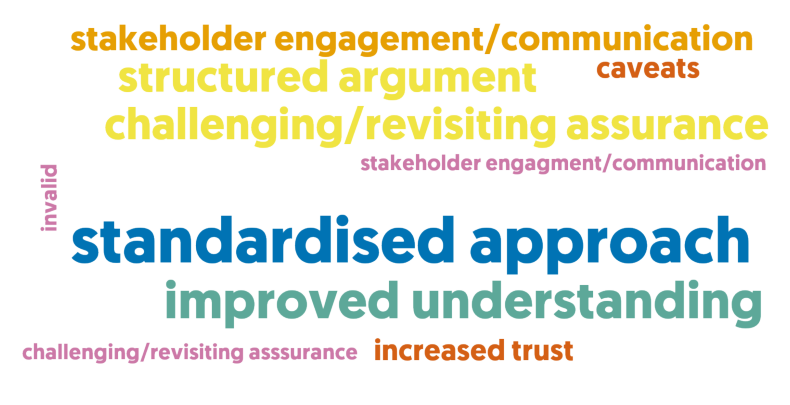

In [98]:
from wordcloud import WordCloud

# Define custom hex colors
custom_colors = ["#0073B4", '#5DA899', '#F0E442', '#E69F03', '#D45F14', '#CC78A7', '#812C55','#00B4DF']


# Create a frequency to color map
# For simplicity, assign a different color to each frequency
frequencies = sorted(set(counter_results.values()), reverse=True)  # Get unique frequencies
frequency_color_map = {freq: custom_colors[i % len(custom_colors)] for i, freq in enumerate(frequencies)}

# Function to map colors to words based on their frequency
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    frequency = counter_results[word]  # Get the frequency of the word
    return frequency_color_map[frequency]  # Return the color for this frequency

# Path to the bold font file (replace with the actual path to your bold font)
font_path = '~/Library/Fonts/Geomanist-Bold.otf'  # Example bold font

# Generate a word cloud from the counter results with custom font and colors
wordcloud = WordCloud(width=1600, height=800, mode="RGBA", background_color="rgba(255, 255, 255, 0)", font_path=font_path).generate_from_frequencies(counter_results)

# Apply the custom color function
wordcloud.recolor(color_func=color_func)
wordcloud.to_file("report_plots/wordcloud_challenges.png")  # Save as PNG

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("report_plots/wordcloud_challenges.svg", dpi=700, format="svg")
plt.show()



In [ ]:
from collections import defaultdict
# Step 3: Initialize a dictionary to store the _ids for each selected code
code_to_ids = defaultdict(list)

# Step 4: Iterate over the specific codes in codes_select and find rows where they are present in 'unique_codes'
for code in codes_select:
    matching_rows = df_data[df_data['unique_codes'].apply(lambda x: code in x)]['_id']
    code_to_ids[code] = matching_rows.tolist()

In [ ]:
filtered_df = df_challenge.loc[code_to_ids['']]
df_data[df_data['_id'].isin(code_to_ids['explaining/communicating value'])]

,_id,operationalization_challenges,codes,unique_codes
7,7adeed37-61d0-4099-a3c5-16e8aa4bde76,time and budget to implement fully and to understand consquential impact of using or sharing insights,"lack of time/budget, explaining/communicating value","{explaining/communicating value, lack of time/budget}"
8,f9bbbd55-0525-4f42-b0da-df7e87c33a1d,"Lack of definition of what constitutes public value; lack of agreement over what value creation is needed (when there is a range of stakeholders in the room)\nConcerns around managing security and openness; Challenges around gathering data from varied sources, making it interoperable and assuring its quality; \nStandards and interfaces for federation\nImmaturity of the sector wrt curation - also the long timescales of data required for built environment management (where physical assets persist for >>100 years)\nEvolution - what does it mean, how do we do it?","balancing openness vs privacy, data concerns, evolution:how to assure DTs, curation:contextual/sector-specific concerns, curation:maturity of sector, value:lack of consistency, value:explaining/communicating value, security:data concerns, openness:data concerns, federation:lack of consistency","{balancing openness vs privacy, contextual/sector-specific concerns, explaining/communicating value, how to assure DTs, lack of consistency, maturity of sector, data concerns}"
14,dca9ab1a-c6b7-4d57-bb0e-34654846a395,Data availability and interoperability is a challenge across organisations including getting partners to understand the opportunity and benefit at a systems of systems level to change organisational thinking.,"data concerns, explaining/communicating value, changing/adding to organisational processes","{explaining/communicating value, changing/adding to organisational processes, data concerns}"
17,cdc34fdc-4fef-46ce-aec6-2e853c34cb1c,explaining to individuals the whole concept to help them understand how these things will be achieved,explaining/communicating value,{explaining/communicating value}
20,dc2e6228-8b6a-4915-85be-a534bded8e95,"The fact that the purpose of digital twin is to add value, and also that most people think digital twins are an IT challenge and thus not applicable to them,",explaining/communicating value,{explaining/communicating value}
31,a57a0b04-2b81-45d9-a2e1-4f5339eab7b8,A proper understanding of why a digital twin is being created,explaining/communicating value,{explaining/communicating value}
32,2c73322c-ce9d-472e-8700-555874d71640,"Understanding of the benefits/potential benefits, which may be in the future/to wider society, versus the very immediate operational challenges and risks.","explaining/communicating value, short-term vs long-term interests","{explaining/communicating value, short-term vs long-term interests}"
42,190b0260-861c-4677-b211-074b51b0b27c,Having defined the 7+1 Principles to support the role of Digital Twins in safety assurance through life I have found it difficult to gain traction within my organisation to implement those principles. Primarily as we have taken time to get a workable understanding of what a Digital Twin is in the context of our products and programmes.,"changing/adding to organisational processes, explaining/communicating value","{explaining/communicating value, changing/adding to organisational processes}"
46,f5f66e46-ffe7-4396-a7c9-aa7e44a16fff,"Being able to communicate the value to their end customers. For us as assurers, it is hard to show what value our customers will get from assurance as the main beneficiary may be our customers' customers",explaining/communicating value,{explaining/communicating value}


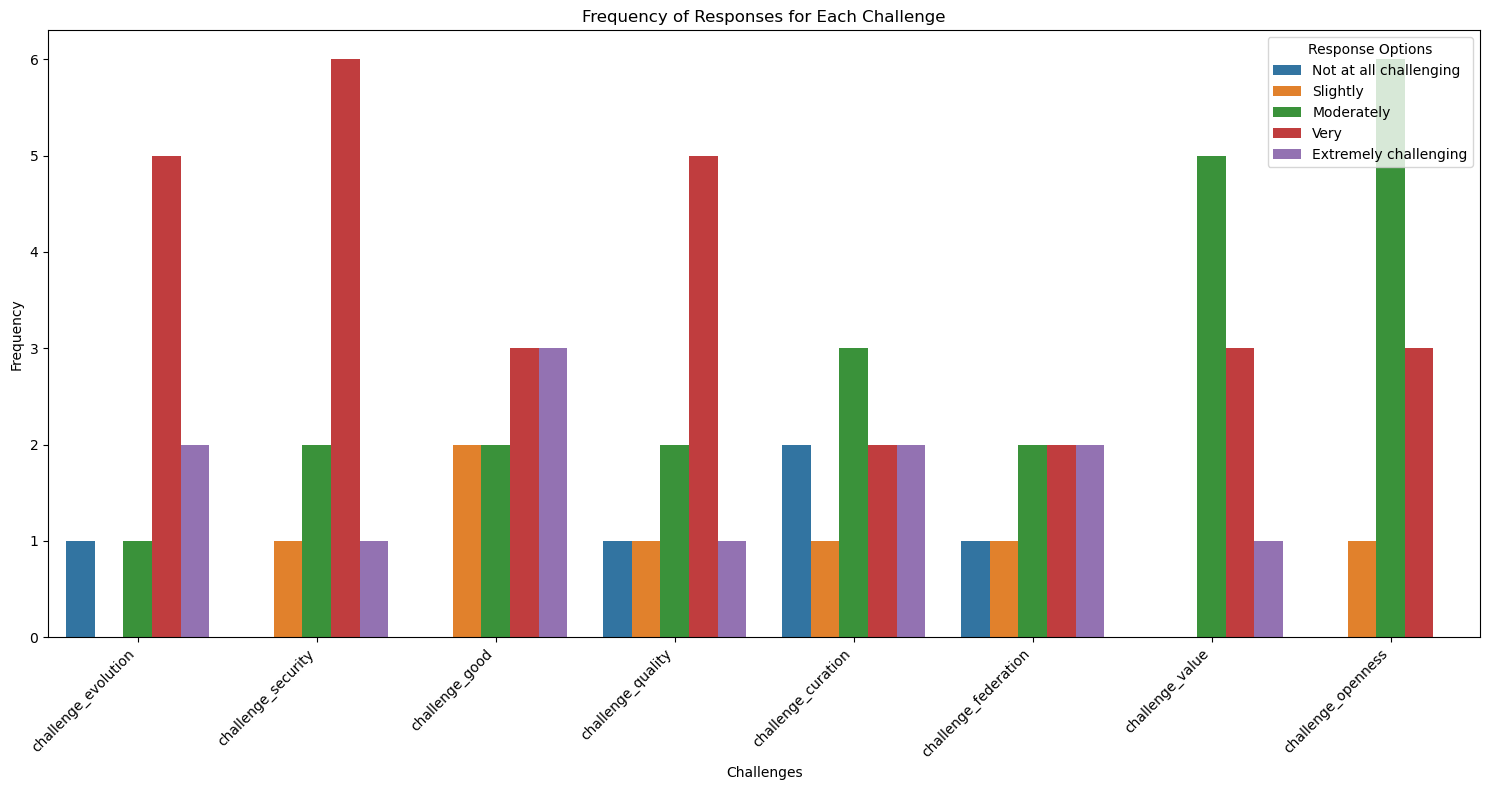

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_df' is your filtered DataFrame
challenge_columns = [col for col in filtered_df.columns if col.startswith('challenge_')]

# Melt the DataFrame to long format for seaborn
melted_df = filtered_df[challenge_columns].melt(var_name='Challenge', value_name='Response')

# Define the order of response labels
response_labels = ["Not at all challenging", "Slightly", "Moderately", "Very", "Extremely challenging"]

# Calculate the total frequency of "Very" and "Extremely challenging" responses
challenge_order = (melted_df[melted_df['Response'].isin(["Very", "Extremely challenging"])]
                   .groupby('Challenge')
                   .size()
                   .sort_values(ascending=False)
                   .index)

# Create the grouped bar plot with sorted challenges
plt.figure(figsize=(15, 8))
sns.countplot(data=melted_df, x='Challenge', hue='Response', order=challenge_order, hue_order=response_labels)

# Customizing the plot
plt.xlabel('Challenges')
plt.ylabel('Frequency')
plt.title('Frequency of Responses for Each Challenge')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response Options')
plt.tight_layout()

# Show the plot
plt.show()


## Insights Report

### #1 "How to assure DTs"
- definition: respondent is unsure where to begin or expresses lack of knowledge needed, including lack of definitions or metrics/KPIs
- most associated with principles: evolution, value, security, public good or quality
- examples:
    - "Terms not well enough defined in our context"
    - "it is not clear what 'public good in perpetuity' would look like"
    - "one of the main challenges is how to assess impact"
    - "Lack of definition of what constitutes public good"
    - "Lack of agreement over what value creation is needed"
    - "evaluating impact and kpis


### #2 "data concerns"
- most associated with principles: quality, federation, security
- examples:
    - "managing consent of their data"
    - "protection of secure data with limited budget"
    - "gathering data from varied sources, making it interoperable and assuring its quality"
    imperfect data sources:
    - data being incomplete
    - "Trusting the data"
    - "the acquisition of data on which digital twins are typically built is generally not standard in medical practice"
    data sharing
    - "Data availability and interoperability is a challenge across organisations"
    - "Sharing data into an open architecture platform"
    - "Lack of standards and frameworks for data exchange among physical digital twins"

### #3 "lack of consistency"
- most associated with principles: federation, evolution, quality, value
- examples:
    - "Consistency across organisations, accepted standards, lack of a central authority"
    - "Standards and interfaces for federation"
    - "lack of standards and frameworks for data exchange among physical digital twins"
    - "across different platforms integration is challenging due to different standards/formats used to output the data"
    - "Although open standards are available it is difficult to find products that apply these in a consistent way "
    - "Enforcing syntactic interoperability"
    - "For Federation, the idea of a "standard connected environment" is wooly. In my experience the "standard" varies alot and in my view the how the model is actually constructed or deployed will be context and time specific "
    - "Consistency and consensus within a specific sector is our main challenge."

### #4 "explaining/communicating value"
- most associated with federation, openness, value
- examples:
    - "lack of agreement over what value creation is needed when there is a range of stakeholders in the room"
    - "interoperability is a challenge across organisations including getting partners to understand the opportunity and benefit at a systems of systems level"
    - "explaining to individuals the whole concept to help them understand how these things will be achieved"
    - "most people think digital twins are an IT challenge and thus not applicable to them"
    - "A proper understanding of why a digital twin is being created"
    - "Understanding of the benefits/potential benefits, which may be in the future/to wider society,"
    - "we have taken time to get a workable understanding of what a Digital Twin is in the context of our products and programmes."
    - "Being able to communicate the value to their end customers"
    